Index(['Age',     0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22],
      dtype='object')


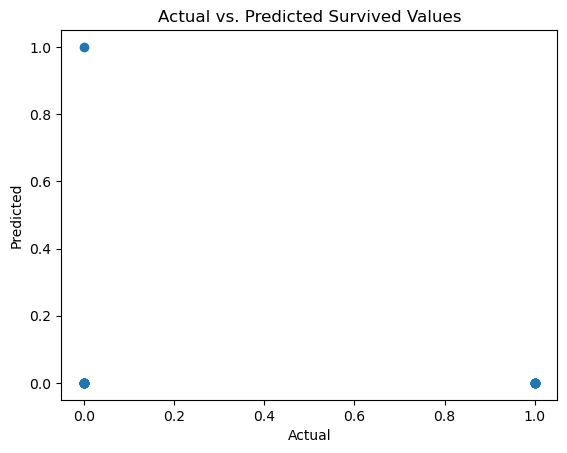

Accuracy: 0.5909

Confusion Matrix:
[[13  1]
 [ 8  0]]


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("titanic-tested.csv")

# Select desired columns
selected_columns = ["Survived", "Pclass", "Gender", "Age", "SibSp", "Parch", "Embarked"]
df = df[selected_columns]

# Separate features and label
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
categorical_features = ["Pclass", "Gender", "SibSp", "Parch", "Embarked"]
# sparse output =True  , hide zero ,if False= allocate memory for zero also, (numpy dense array)
# drop= First means first column will be dropped after one hot encoding to save memory
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(X_train[categorical_features])
encoded_test = encoder.transform(X_test[categorical_features])

# Combine encoded features with numerical features (Age)
X_train = pd.concat([X_train.drop(categorical_features, axis=1), pd.DataFrame(encoded_train)], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), pd.DataFrame(encoded_test)], axis=1)

print(X_train.columns)

# Check for mixed data types in feature names (if needed)
if not all(isinstance(col, str) for col in X_train.columns):
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

# Drop samples with missing values (optional, consider imputation if needed)
missing_rows = X_train.isna().any(axis=1)  # Check if any value is NaN in each row
X_train_filtered = X_train.loc[~missing_rows]  # Filter out rows with missing values (optional)
y_train_filtered = y_train.loc[~missing_rows]  # Filter labels accordingly (optional)

missing_rows = X_test.isna().any(axis=1)  # Check if any value is NaN in each row
X_test_filtered = X_test.loc[~missing_rows]  # Filter out rows with missing values (optional)
y_test_filtered = y_test.loc[~missing_rows]  # Filter labels accordingly (optional)

# Standard scale the Age feature
scaler = StandardScaler()
scaler.fit(X_train_filtered[["Age"]])  # Fit only on filtered data (optional)
X_train_filtered.loc[:, "Age"] = scaler.transform(X_train_filtered[["Age"]])
X_test_filtered.loc[:, "Age"] = scaler.transform(X_test_filtered[["Age"]])  # Use the same scaler for testing data

# Perform logistic regression (classification)
model = LogisticRegression()
model.fit(X_train_filtered, y_train_filtered)

# Make predictions on testing set
y_pred = model.predict(X_test_filtered)

# Actual vs Predicted Plot
plt.scatter(y_test_filtered, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Survived Values")
plt.show()

# Calculate accuracy (using accuracy_score for classification)
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix (for classification)
confusion_matrix = confusion_matrix(y_test_filtered, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
